In [15]:
import numpy as np
import pandas as pd
import plotnine as pn

from datetime import datetime, date

from sciterra.mapping.atlas import Atlas
from sciterra.mapping.cartography import Cartographer
from sciterra.vectorization.scibert import SciBERTVectorizer

In [16]:
atlas_dir = "outputs/atlas_s2-7-20-23_uncentered_imeletal/"

In [17]:
# load atlas
# convert all datetimes to dates
# filter all pubs without citations
# measure density
# measure citations per year
# plot density against citation frequency

In [18]:
atl = Atlas.load(atlas_dir)

No bad_ids to read, skipping.


In [19]:
len(atl)

16354

In [20]:
vectorizer = SciBERTVectorizer(device="mps")
crt = Cartographer(vectorizer=vectorizer)

Using device: mps.


In [21]:
measurements = crt.measure_topography(atl, metrics=["density", "edginess"])

Computing ['density', 'edginess'] for 16354 publications.


100%|██████████| 16354/16354 [00:20<00:00, 801.34it/s] 


In [22]:
citations_per_year = [ 
    atl[id].citation_count / (2023 - atl[id].publication_date.year) if atl[id].publication_date.year < 2023 else 0
    for id in atl.projection.index_to_identifier
]
citations_per_year

[26.2,
 8.5,
 11.466666666666667,
 3.5,
 0.75,
 19.09090909090909,
 20.4,
 1.5,
 14.5,
 128.25,
 65.54545454545455,
 1.5714285714285714,
 2.6666666666666665,
 23.857142857142858,
 6.0,
 0.5,
 1.0,
 23.2,
 6.571428571428571,
 3.75,
 7.0,
 22.625,
 13.0,
 1.0,
 12.816901408450704,
 16.666666666666668,
 26.205479452054796,
 5.333333333333333,
 16.714285714285715,
 0.0,
 0.0,
 0.75,
 1.5769230769230769,
 3.5,
 6.428571428571429,
 0.0,
 0.3076923076923077,
 0.11764705882352941,
 309.8888888888889,
 0.25,
 1.0,
 3.2222222222222223,
 0.0,
 1.0588235294117647,
 0.12,
 4.3125,
 1.6666666666666667,
 0.6,
 1.0,
 1.8,
 0.125,
 7.0,
 29.357142857142858,
 0.8461538461538461,
 1.75,
 1.1538461538461537,
 1.2222222222222223,
 11.0,
 0.5,
 1.5,
 2.0,
 4.0,
 0.0,
 6.333333333333333,
 3.625,
 12.6,
 0.42857142857142855,
 0.0625,
 1.2222222222222223,
 1.0,
 0,
 0.0,
 0.7777777777777778,
 0.5454545454545454,
 30.058823529411764,
 4.0,
 0.16666666666666666,
 0.0,
 0.5,
 0.0,
 3.5714285714285716,
 35.84,
 1.

In [23]:
# count zeros, i.e. where citation_count was zero
len(citations_per_year) - np.count_nonzero(citations_per_year)

3107

In [24]:
df = pd.DataFrame(
    measurements,
    columns=["density", "edginess"],
)
df["citations_per_year"] = citations_per_year
df

density  edginess  citations_per_year
0      12.334017  0.828193           26.200000
1      12.569195  0.801907            8.500000
2      13.434385  0.989204           11.466667
3      13.204854  0.769811            3.500000
4      13.083671  0.758256            0.750000
...          ...       ...                 ...
16349  13.262735  0.766139            0.000000
16350  13.744198  0.960988            0.285714
16351  12.541898  0.793921            3.857143
16352  12.767569  0.882204            0.454545
16353  12.664083  0.808174            0.833333

[16354 rows x 3 columns]

geom_point : Removed 16 rows containing missing values.


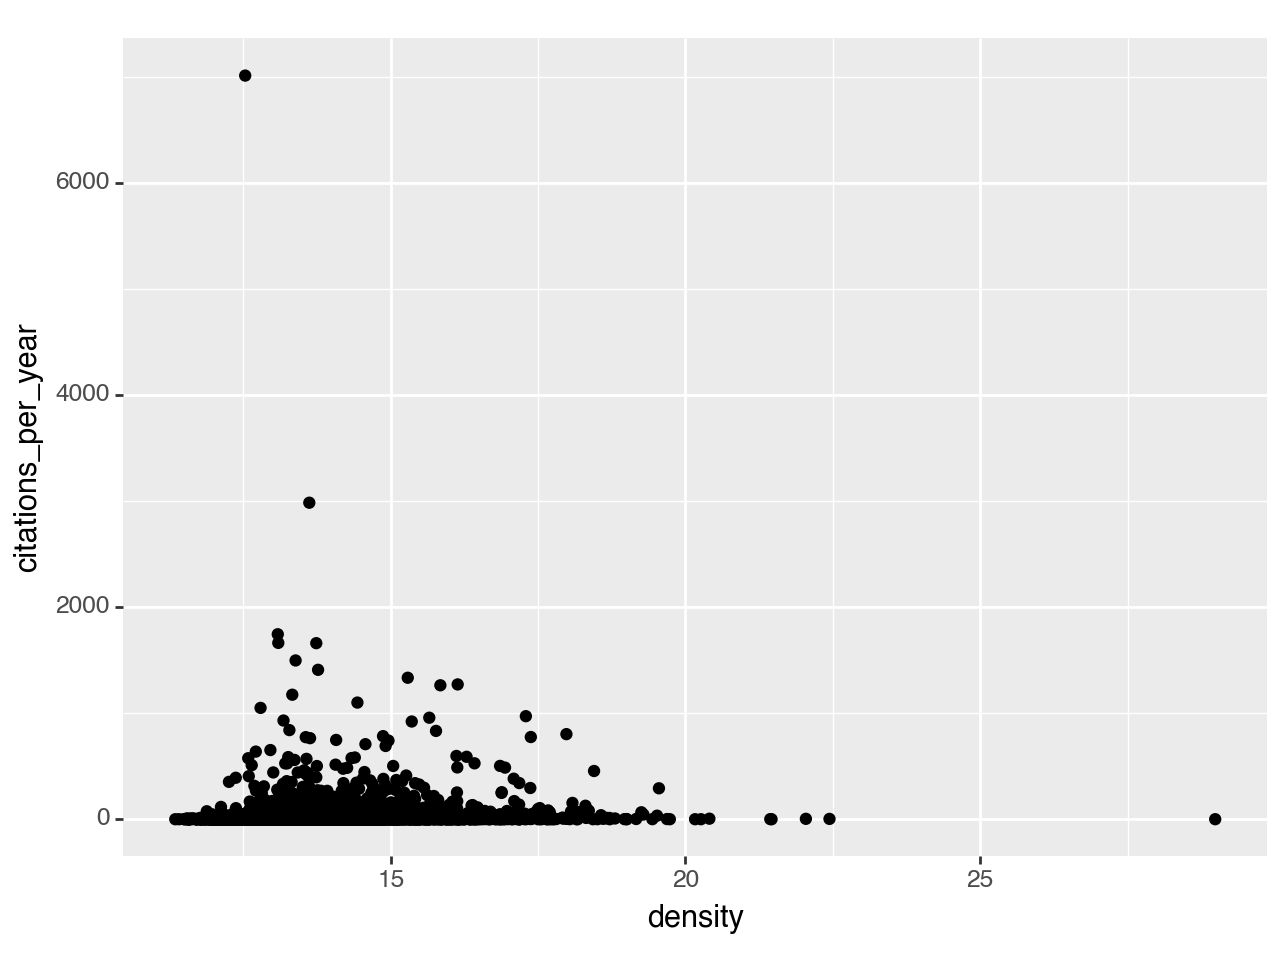

<Figure Size: (640 x 480)>

In [25]:
(
    pn.ggplot(
        df,
        mapping=pn.aes(x="density", y="citations_per_year")
    )
    + pn.geom_point()
    # + pn.geom_smooth(color="orange")
)

geom_point : Removed 373 rows containing missing values.
geom_smooth : Removed 7 rows containing missing values.


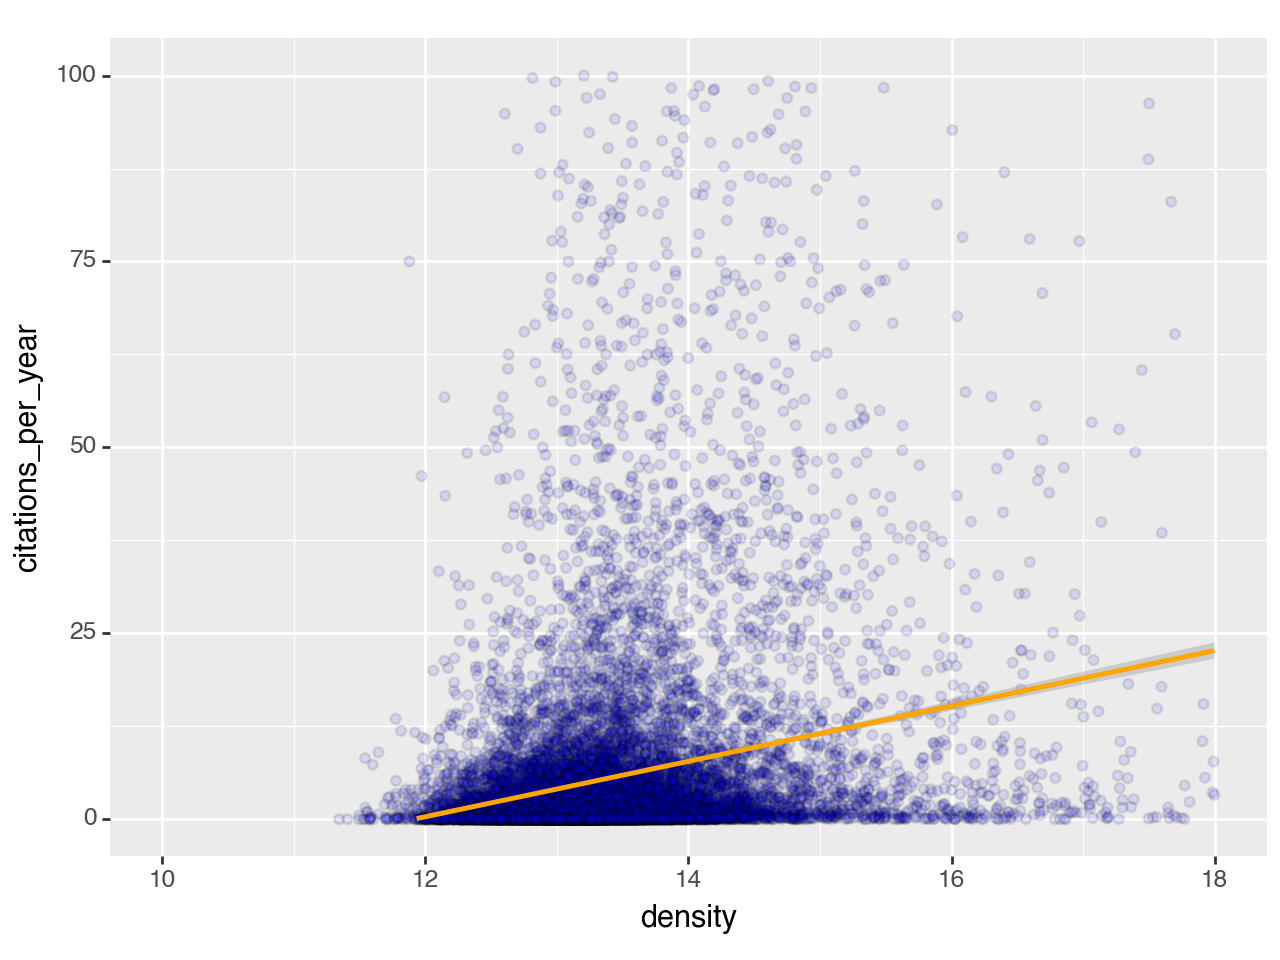

<Figure Size: (640 x 480)>

In [26]:
(
    pn.ggplot(
        df,
        mapping=pn.aes(x="density", y="citations_per_year")
    )
    + pn.geom_point(fill="blue", alpha=0.1,)
    + pn.geom_smooth(color="orange")
    + pn.xlim(10, 18)
    + pn.ylim(0, 100)
)

maybe the reason it seems like citations increase with density is actually not so interesting:

maybe it's that most papers just get few citations and are in the lower to mid range of density. Then when you get to higher density, there citation distribution just becomes more uniform. 

maybe. But why doesn't this argument apply in the other direction -- why does the citations not become more uniform at lower density?

divide by zero encountered in log10
geom_point : Removed 24 rows containing missing values.


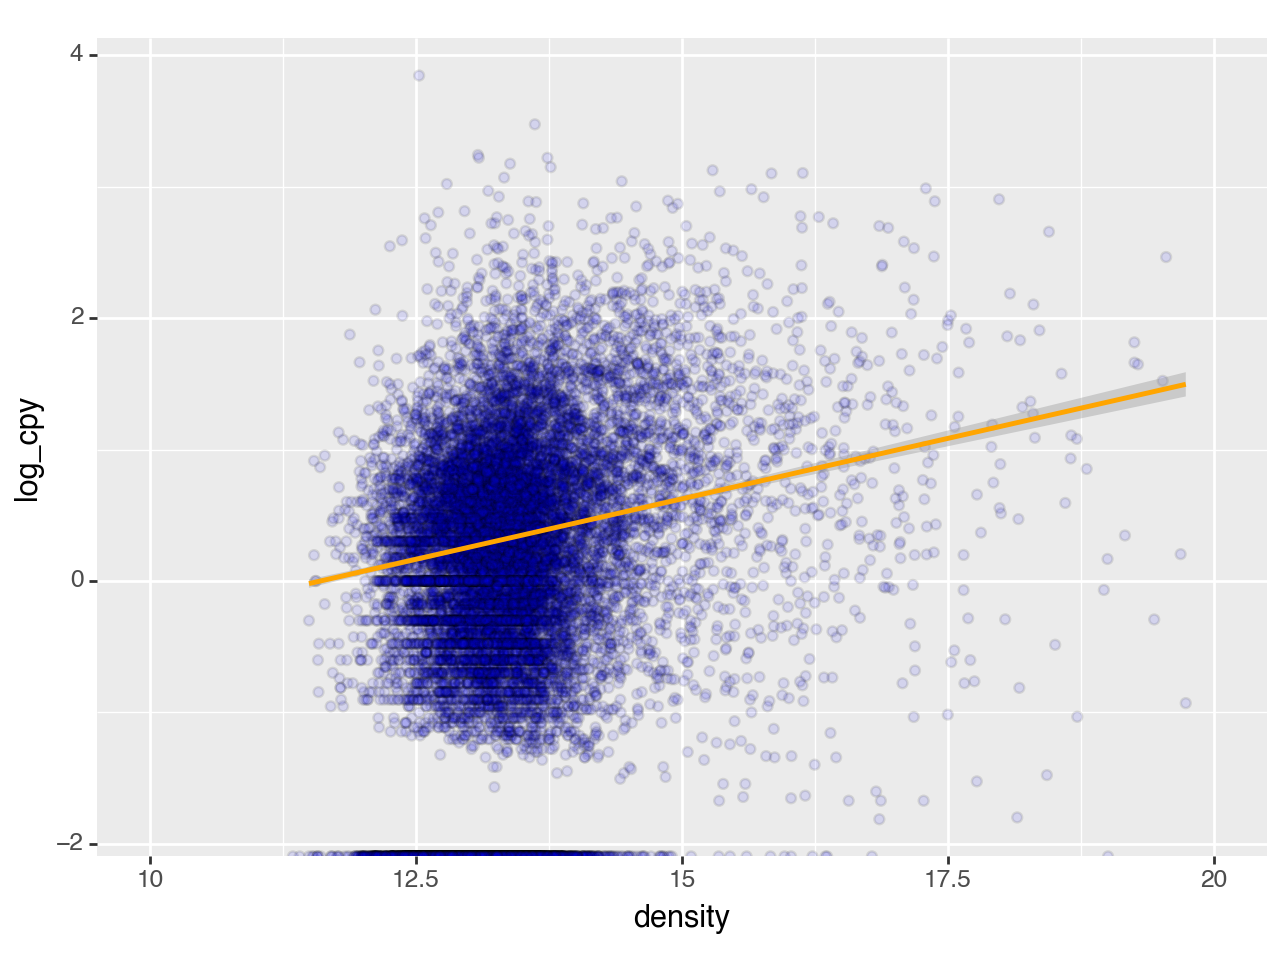

<Figure Size: (640 x 480)>

In [27]:
# log?
df["log_cpy"] = np.log10(citations_per_year)
(
    pn.ggplot(
        df,
        mapping=pn.aes(x="density", y="log_cpy")
    )
    + pn.geom_point(fill="blue", alpha=0.1,)
    + pn.geom_smooth(color="orange")
    + pn.xlim(10, 20)
)

geom_point : Removed 334 rows containing missing values.


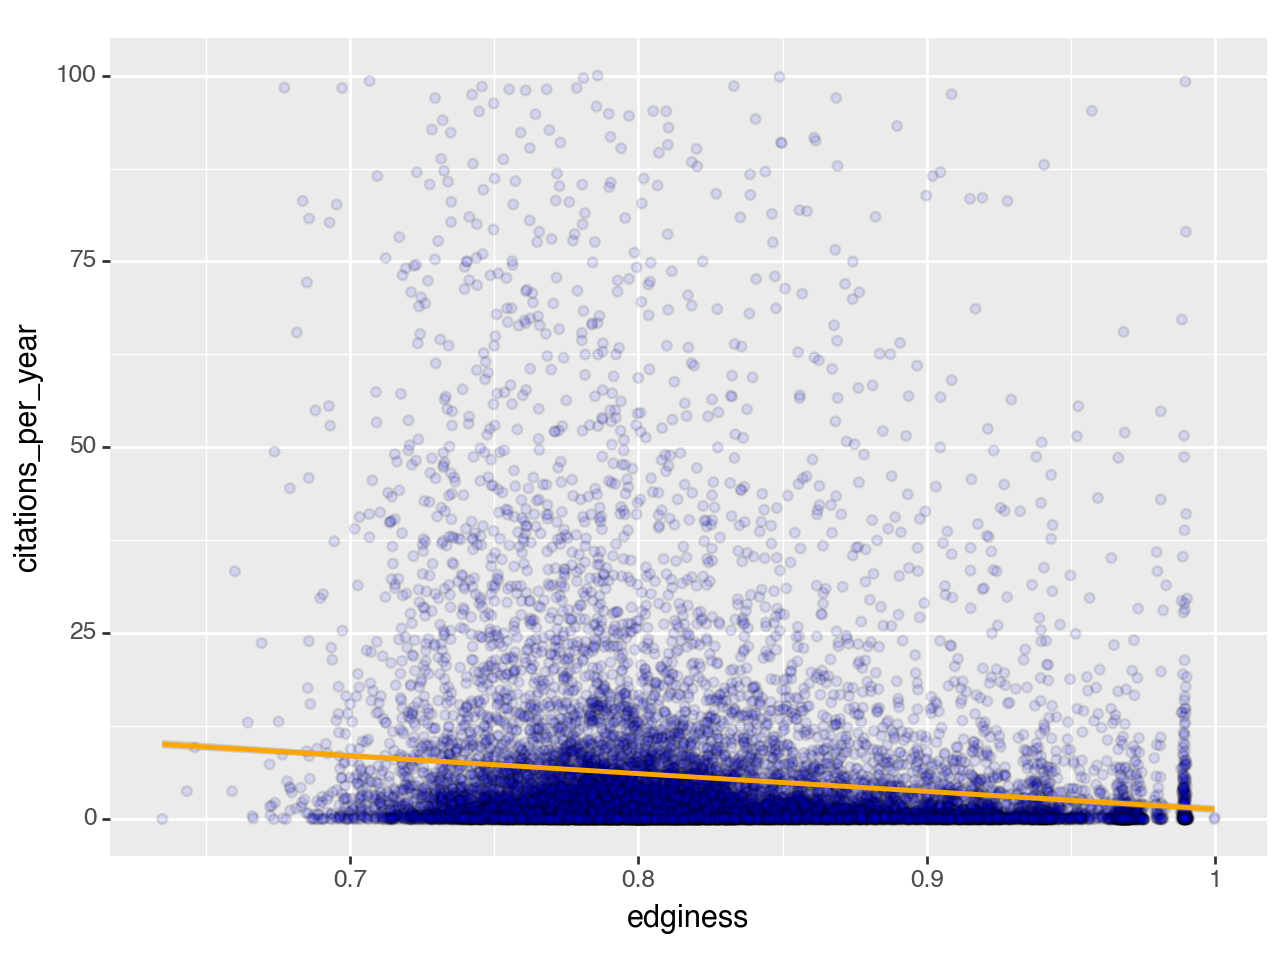

<Figure Size: (640 x 480)>

In [31]:
# asymmetry

(
    pn.ggplot(
        df,
        mapping=pn.aes(x="edginess", y="citations_per_year")
    )
    + pn.geom_point(fill="blue", alpha=0.1,)
    + pn.geom_smooth(color="orange")
    # + pn.xlim(10, 18)
    + pn.ylim(0, 100)
)

normalizem

In [36]:
density = measurements[:, 0]
edginess = measurements[:, 1]

normalize = lambda arr: (arr - np.nanmean(arr)) / np.nanstd(arr)

density = normalize(density)
edginess = normalize(edginess)

In [70]:
df_n = pd.DataFrame(
    list(zip(density, edginess, citations_per_year)),
    columns=["density", "edginess", "citations_per_year"],
)
df_n

density  edginess  citations_per_year
0     -1.277224  0.093758           26.200000
1     -1.004767 -0.307267            8.500000
2     -0.002432  2.550154           11.466667
3     -0.268347 -0.796926            3.500000
4     -0.408739 -0.973204            0.750000
...         ...       ...                 ...
16349 -0.201290 -0.852940            0.000000
16350  0.356491  2.119682            0.285714
16351 -1.036391 -0.429107            3.857143
16352 -0.774948  0.917745            0.454545
16353 -0.894838 -0.211655            0.833333

[16354 rows x 3 columns]

geom_point : Removed 9915 rows containing missing values.


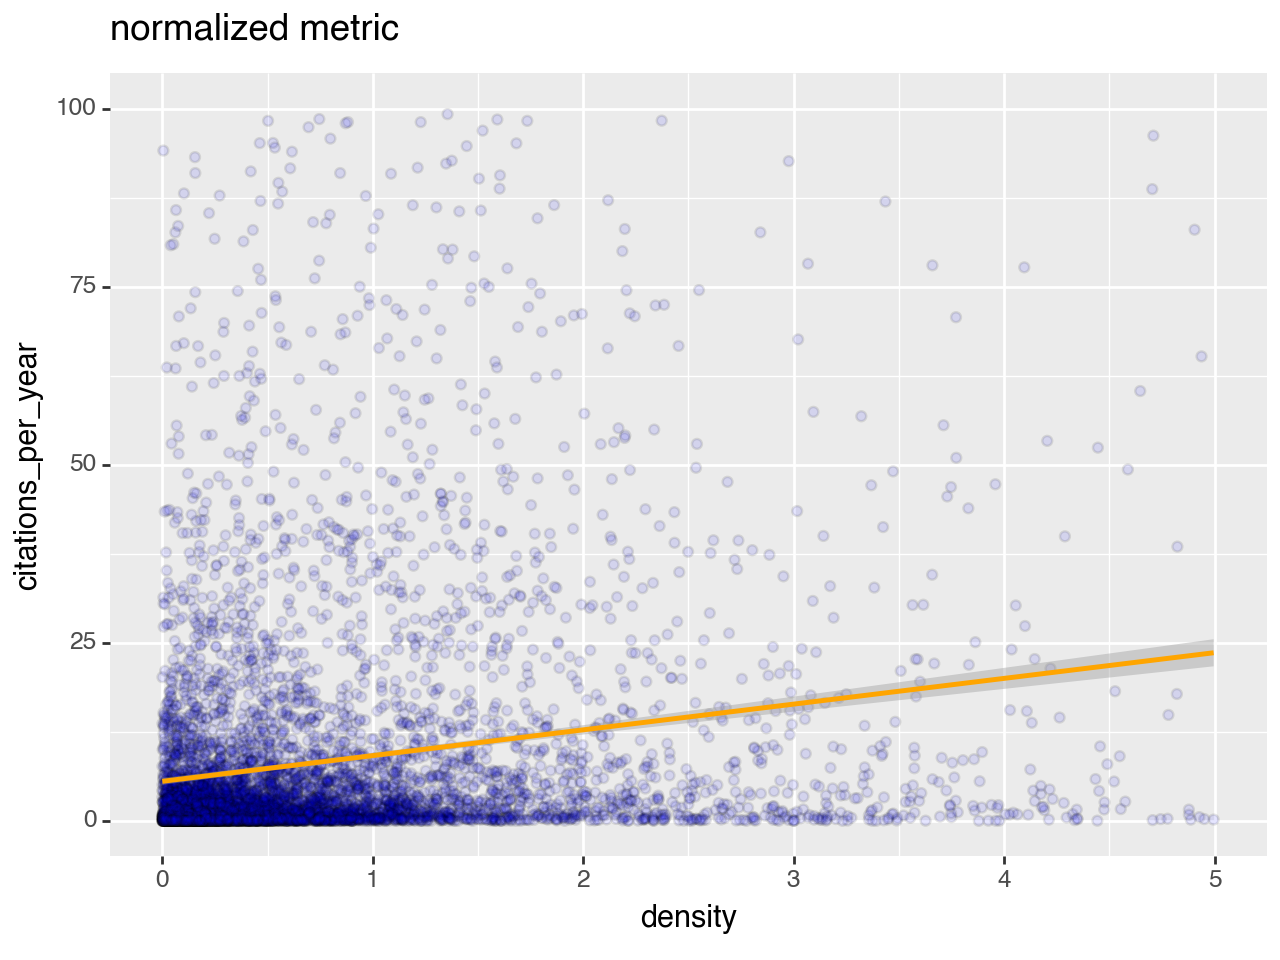

<Figure Size: (640 x 480)>

In [48]:
# This doesn't make much sense because edginess is already normalized to 0,1
(
    pn.ggplot(
        df_n,
        mapping=pn.aes(x="density", y="citations_per_year")
    )
    + pn.geom_point(fill="blue", alpha=0.1,)
    + pn.geom_smooth(color="orange")
    + pn.xlim(0, 5)
    + pn.ylim(0, 100)
    + pn.ggtitle("normalized metric")
)

geom_point : Removed 2529 rows containing missing values.


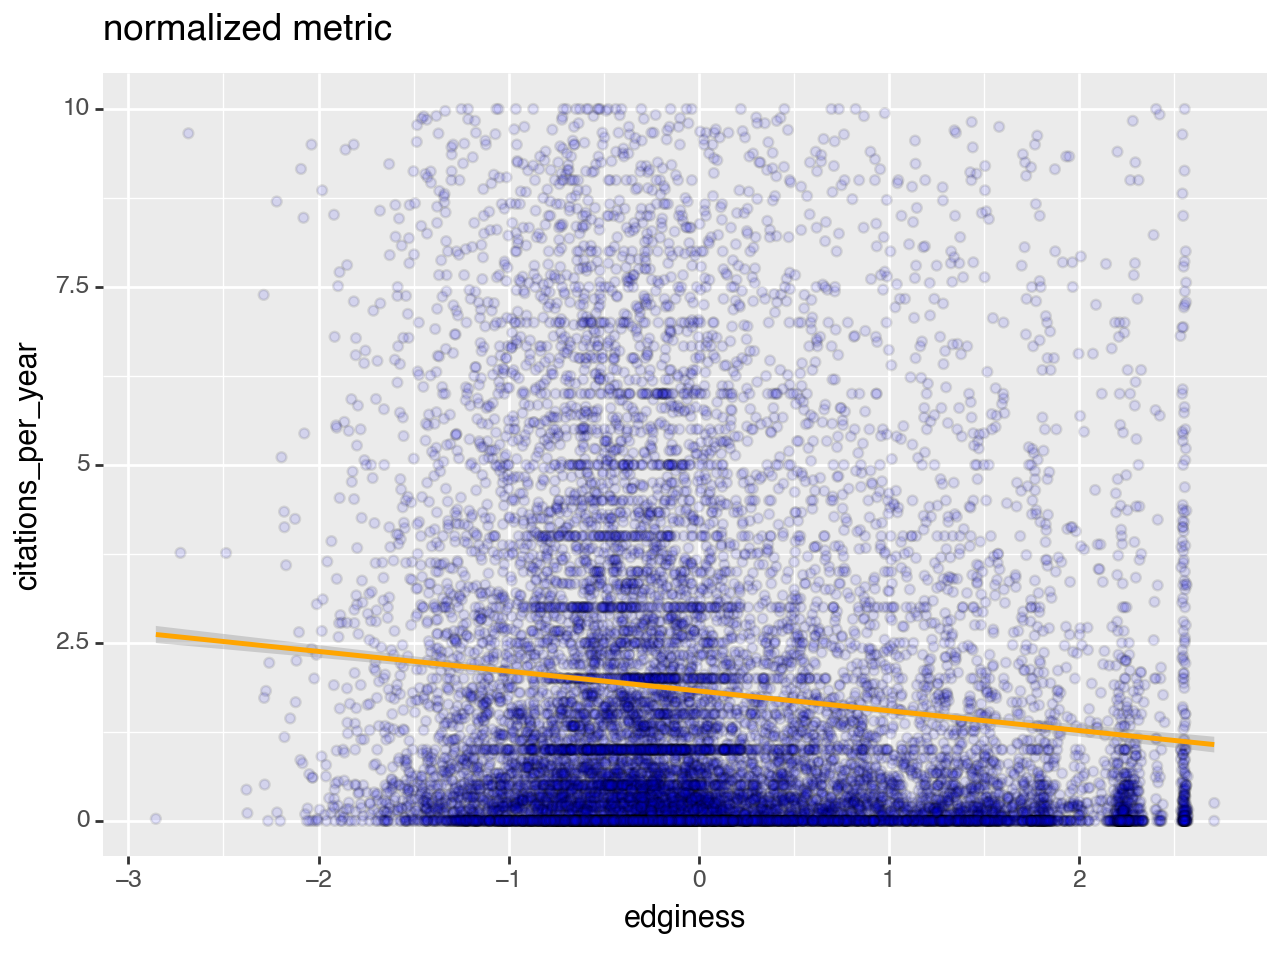

<Figure Size: (640 x 480)>

In [42]:
# This doesn't make much sense because edginess is already normalized to 0,1
(
    pn.ggplot(
        df_n,
        mapping=pn.aes(x="edginess", y="citations_per_year")
    )
    + pn.geom_point(fill="blue", alpha=0.1,)
    + pn.geom_smooth(color="orange")
    # + pn.xlim(10, 18)
    + pn.ylim(0, 10)
    + pn.ggtitle("normalized metric")
)

In [53]:
np.std(citations_per_year)

81.5677585909105

In [54]:
np.mean(citations_per_year)

11.651584417036505

against each other

geom_point : Removed 16 rows containing missing values.


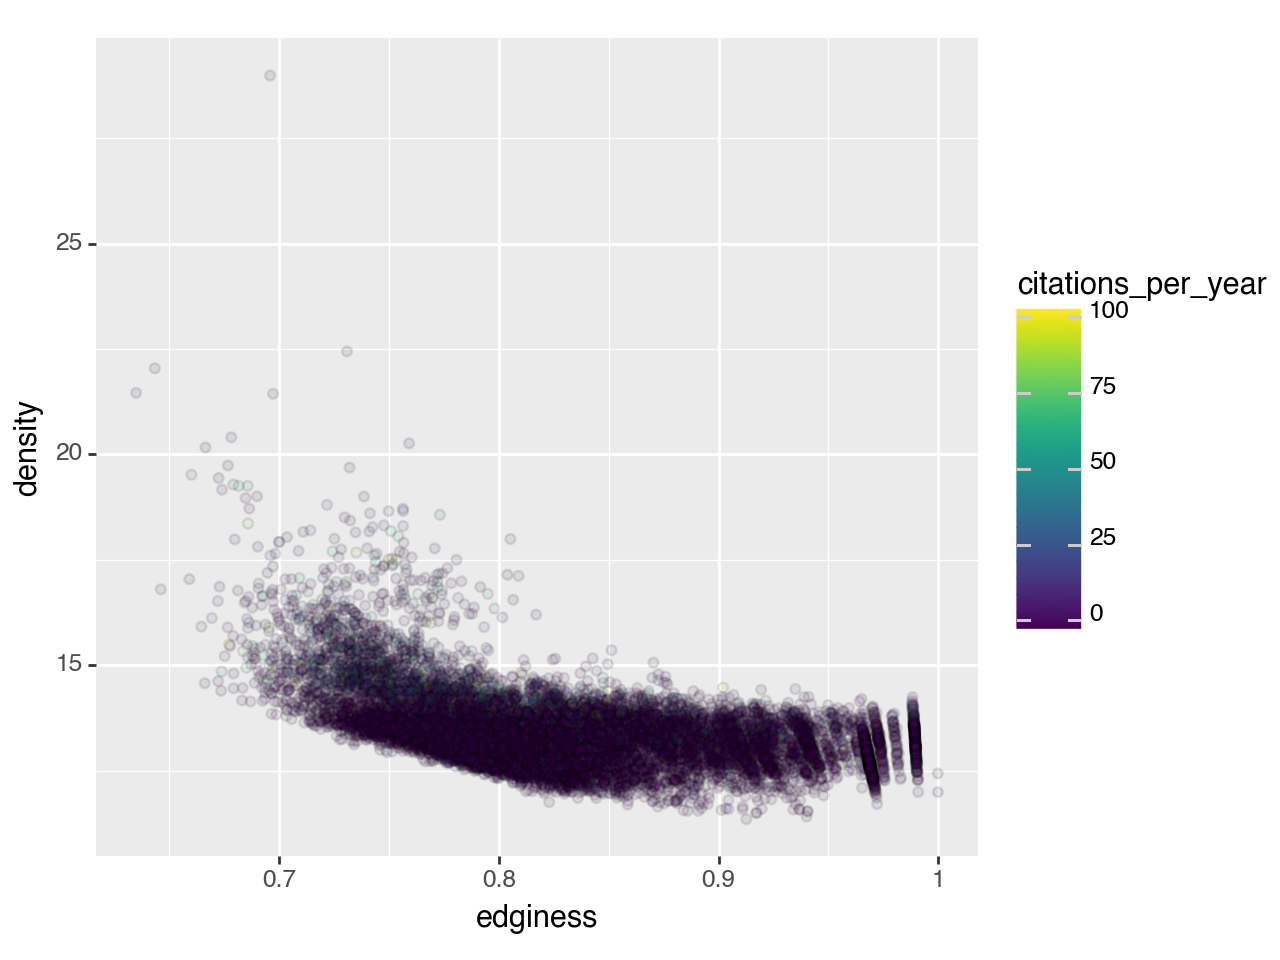

<Figure Size: (640 x 480)>

In [58]:
# not normalized

# also remove citations per year more than a few std devs
# for now just truncate after 100
df_a = df[df["citations_per_year"] <= 100] # or even less

# how to reduce overplotting? Can I make the hotter colors appear on top?
(
    pn.ggplot(
        df_a,
        mapping=pn.aes(x="edginess", y="density")
    )
    + pn.geom_point(
        # fill="blue", 
        mapping=pn.aes(fill="citations_per_year"),
        alpha=0.1,
        )
)

geom_point : Removed 8283 rows containing missing values.


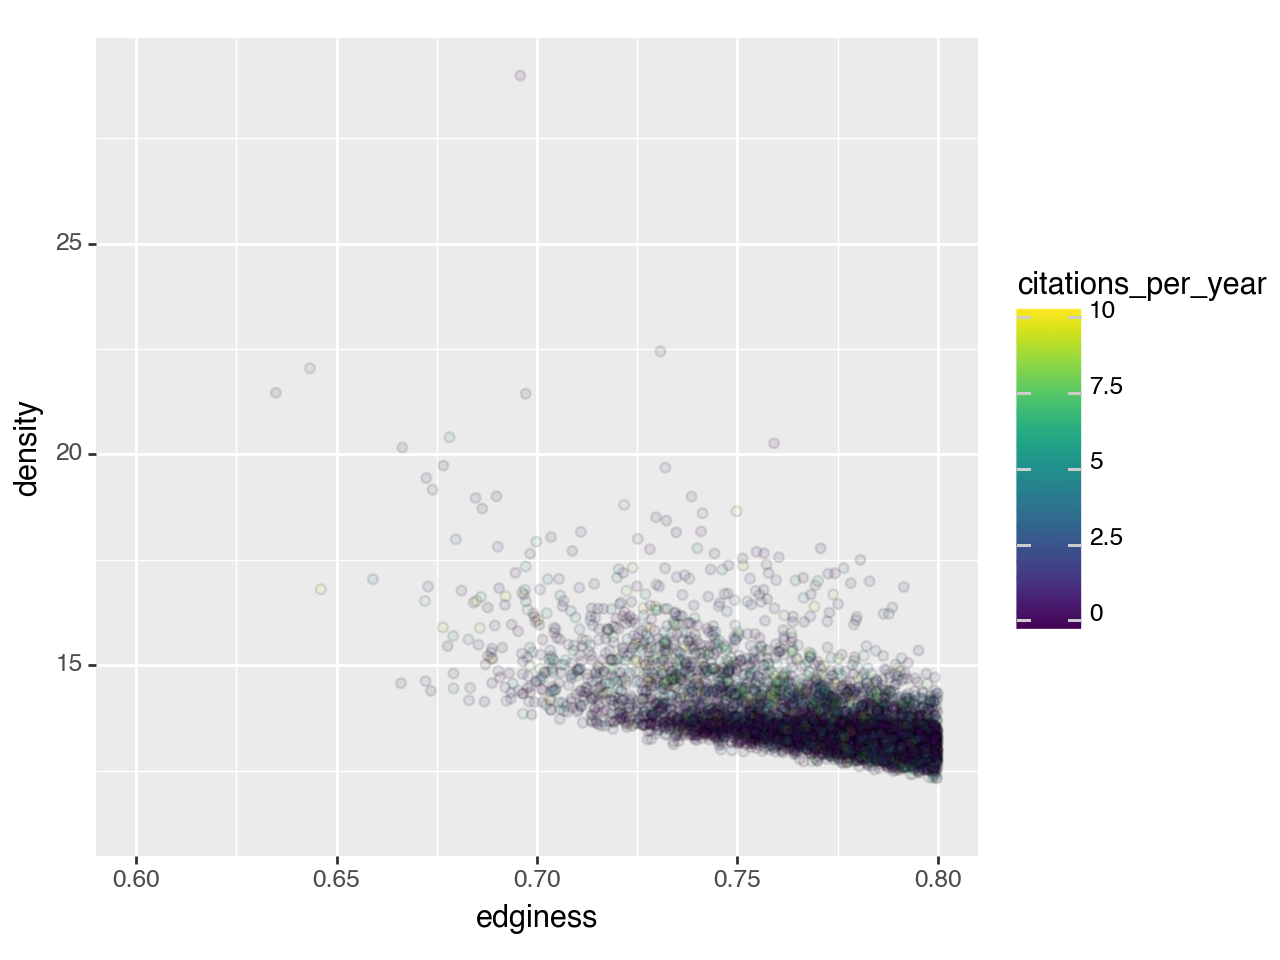

<Figure Size: (640 x 480)>

In [75]:
# let's only plot pubs for high cites per year
df_b = df[df["citations_per_year"] >= 0]
df_b = df[df["citations_per_year"] <= 10]

# how to reduce overplotting? Can I make the hotter colors appear on top?
(
    pn.ggplot(
        df_b,
        mapping=pn.aes(x="edginess", y="density")
    )
    + pn.geom_point(
        # fill="blue", 
        mapping=pn.aes(fill="citations_per_year"),
        alpha=0.1,
        )
)

this does not look like the distribution that zach had.